In [1]:
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.stattools import jarque_bera
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import truncnorm
from scipy import stats
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
import scipy.stats as st


# 3.3

Предложить метод выбора наиболее важных признаков для логистической регрессии на основе изученных методов прикладной статистики. Осуществить выбор.

In [2]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [3]:
data = load_wine()

In [4]:
X = data['data']
y = data['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Посмотрим на взаимные корреляции признаков. Никакая пара сильно не коррелирует, применим методы множественной корелляции.

In [5]:
df = pd.DataFrame(X)
corr = df.corr(method='kendall')
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0.0938437,0.170154,-0.212978,0.250506,0.209099,0.191087,-0.109554,0.133526,0.434353,-0.021717,0.0615129,0.449387
1,0.0938437,1,0.158178,0.210119,0.0508685,-0.174929,-0.211918,0.175129,-0.168714,0.195607,-0.388707,-0.162909,-0.04466
2,0.170154,0.158178,1,0.258352,0.254246,0.0898552,0.0494741,0.0989365,0.0182396,0.187786,-0.0372335,-0.00634133,0.171574
3,-0.212978,0.210119,0.258352,1,-0.121005,-0.256669,-0.309865,0.278091,-0.171404,-0.0572805,-0.23921,-0.226253,-0.313218
4,0.250506,0.0508685,0.254246,-0.121005,1,0.172195,0.161603,-0.158361,0.117871,0.241781,0.02376,0.0343068,0.343016
5,0.209099,-0.174929,0.0898552,-0.256669,0.172195,1,0.701999,-0.310443,0.466517,0.0282637,0.28921,0.478267,0.280203
6,0.191087,-0.211918,0.0494741,-0.309865,0.161603,0.701999,1,-0.378099,0.534615,0.0286743,0.354372,0.520448,0.263661
7,-0.109554,0.175129,0.0989365,0.278091,-0.158361,-0.310443,-0.378099,1,-0.269189,0.0360651,-0.179755,-0.363787,-0.174108
8,0.133526,-0.168714,0.0182396,-0.171404,0.117871,0.466517,0.534615,-0.269189,1,-0.0149622,0.231071,0.369104,0.204172
9,0.434353,0.195607,0.187786,-0.0572805,0.241781,0.0282637,0.0286743,0.0360651,-0.0149622,1,-0.291561,-0.206046,0.316632


Применим метод множественного сравнения на основе объясненной дисперсии (F-test). 
$F=\frac{\text { explained variance }}{\text { unexplained variance }}$
or
$F=\frac{\text { between-group variability }}{\text { within-group variability }}$

The explained variance = $\sum_{n_{i}}\left(\bar{X}_{i}-\bar{Y}\right)^{2}/(K-1)$

где $\bar{Y}_{i}$ обозначает среднее в i ой группе group, $n_{i}$ количество наблюдений в i группе, $\bar{Y}$ среднее во всей выборке, и $K$ количество групп.
The unexplained variance =
$$
\sum_{i=1}^{K} \sum_{j=1}^{n_{i}}\left(Y_{i j}-\bar{Y}_{i}\right)^{2} /(N-K)
$$

Применяя F-test выберем два лучших признака.

In [6]:
fs = SelectKBest(score_func=f_classif, k=2)
X_sel = fs.fit_transform(X, y)
print(X_sel.shape)

(178, 2)


In [7]:
col = []
for i in y:
    if i == 0: col.append('blue')
    if i == 1: col.append('red')
    if i == 2: col.append('black')

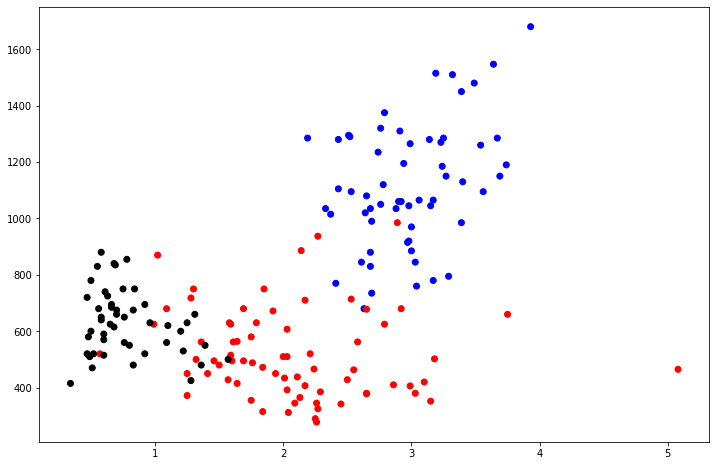

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X_sel[:,0], X_sel[:,1], color = col)

Несмотря на то, что из таблицы корелляции Кендалла не получилось выбрать признаки на основе попарной корелляции, с помощью метода множенственной корелляции получилось эффективно осуществить отбор признаков.